In [57]:
#!/usr/bin/env python
# coding: utf-8

#import scienceplots
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import torch
import os
from numba import cuda 

from helpers.composite_helpers import *

plt.style.use("science.mplstyle")

#plt.style.use('science')
dpi = 800

In [58]:
feta_dir = "/global/ml4hep/spss/rrmastandrea/"
scatterplot_dir = os.path.join(feta_dir, "scatterplot_FETA")

## Visualize the scatterplots 

First run ```run_scatterplot.py```

In [72]:
# Load in the data

num_signal_to_inject = 2500


feta_results = np.load(f"{scatterplot_dir}/feta_results_seedNN0_nsig{num_signal_to_inject}.npy")
cathode_results = np.load(f"{scatterplot_dir}/cathode_results_seedNN0_nsig{num_signal_to_inject}.npy")
curtains_results = np.load(f"{scatterplot_dir}/curtains_results_seedNN0_nsig{num_signal_to_inject}.npy")
salad_results = np.load(f"{scatterplot_dir}/salad_results_seedNN0_nsig{num_signal_to_inject}.npy")

#full_sup_results = np.load(f"{scatterplot_dir}/full_sup_results_seedNN0.npy")




In [73]:
# standardize the data

def standardize(x):
    return (x - np.mean(x))/np.std(x)

stand_feta = standardize(feta_results)
stand_cathode = standardize(cathode_results)
stand_curtains = standardize(curtains_results)
stand_salad = standardize(salad_results)

#stand_full_sup = standardize(full_sup_results)





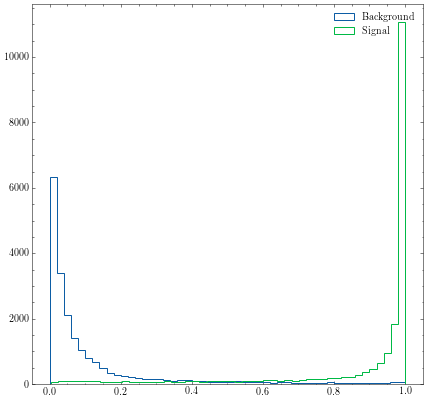

In [74]:

plt.figure()
plt.hist(full_sup_results[:20000], bins = 50, histtype = "step", label = "Background")
plt.hist(full_sup_results[20000:], bins = 50, histtype = "step", label = "Signal")
plt.legend()
plt.show()


In [81]:
import matplotlib.colors as colors

def make_plot(bkg_x, bkg_y, sig_x, sig_y, label_x, label_y, num_bins = 100, plot_lims = 5, vmax = 1e3):
    
    # plot params
    b = np.linspace(-plot_lims, plot_lims, num_bins)
    cmap = "rainbow"
    fontsize = 30
    small_font = 20


    fig, ax = plt.subplots(1, 2, figsize = (16, 8))

    img_bkg = ax[0].hist2d(bkg_x.flatten(), bkg_y.flatten(), bins = b, norm=colors.LogNorm(vmin=1e0, vmax=vmax), cmap = cmap, density = False)
    ax[0].plot([-plot_lims, plot_lims], [-plot_lims, plot_lims], color = "black")
    ax[0].set_xlabel(label_x, fontsize = fontsize)
    ax[0].set_ylabel(label_y, fontsize = fontsize)
    ax[0].set_title("Background", fontsize = fontsize)
    ax[0].set_aspect(1)
    ax[0].set_xlim([-plot_lims, plot_lims])
    ax[0].set_ylim([-plot_lims, plot_lims])
    ax[0].text(1.25, -4, f"$n_\\mathrm{{sig}}$ = {num_signal_to_inject}", fontsize = fontsize)
    ax[0].tick_params(axis='both', which='major', labelsize=small_font)
    

    img_sig = ax[1].hist2d(sig_x.flatten(), sig_y.flatten(), bins = b, norm=colors.LogNorm(vmin=1e0, vmax=vmax), cmap = cmap, density = False)
    ax[1].plot([-plot_lims, plot_lims], [-plot_lims, plot_lims], color = "black")
    ax[1].set_xlabel(label_x, fontsize = fontsize)
    ax[1].set_ylabel(label_y, fontsize = fontsize)
    ax[1].set_title("Signal", fontsize = fontsize)
    ax[1].set_aspect(1)
    ax[1].set_xlim([-plot_lims, plot_lims])
    ax[1].set_ylim([-plot_lims, plot_lims])
    ax[1].text(1.25, -4, f"$n_\\mathrm{{sig}}$ = {num_signal_to_inject}", fontsize = fontsize)
    ax[1].tick_params(axis='both', which='major', labelsize=small_font)
    
    cb_ax = fig.add_axes([.92,.2,.02,.6])
    cbar = fig.colorbar(img_sig[3],orientation='vertical',cax=cb_ax)


    cbar.ax.tick_params(labelsize=small_font, rotation = 270) 
    cbar.set_label("Counts", fontsize = small_font, rotation = 270, labelpad = 20)

    plt.show()
    return fig


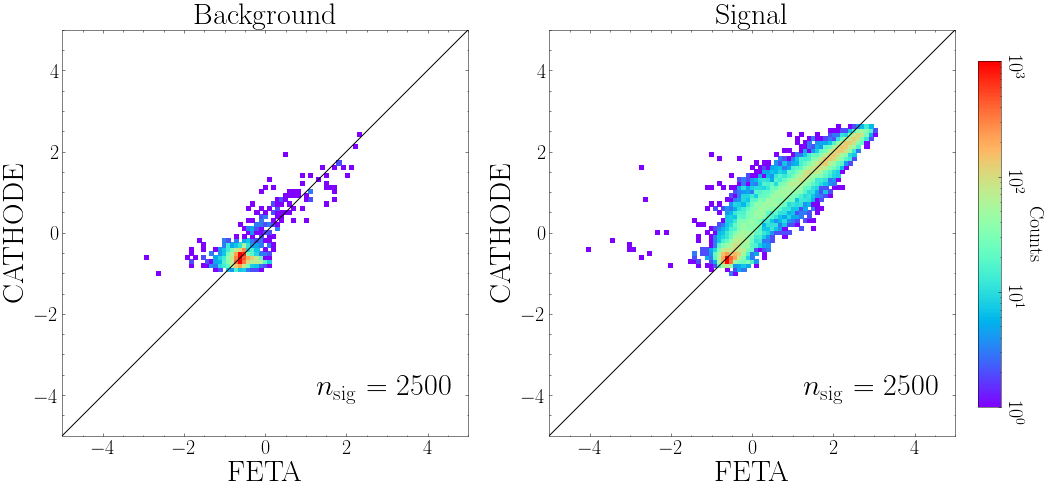

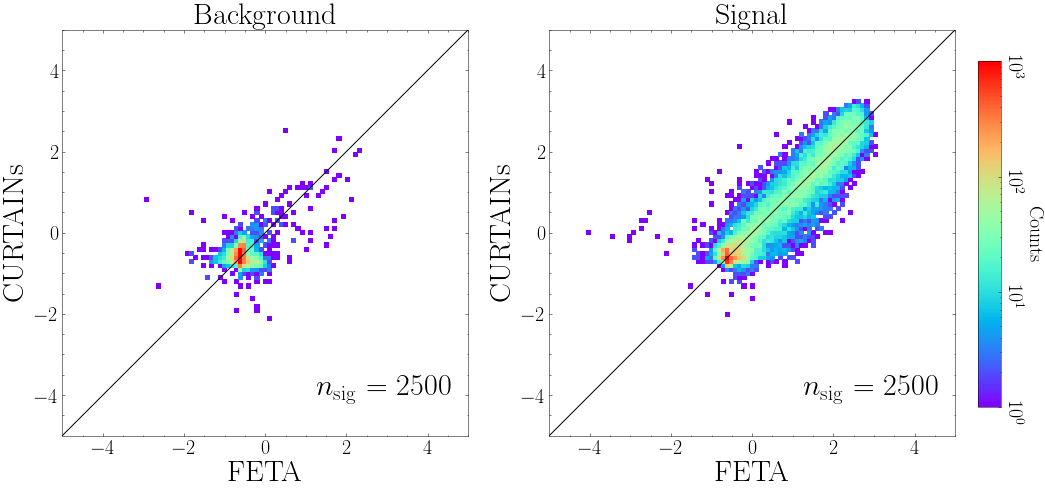

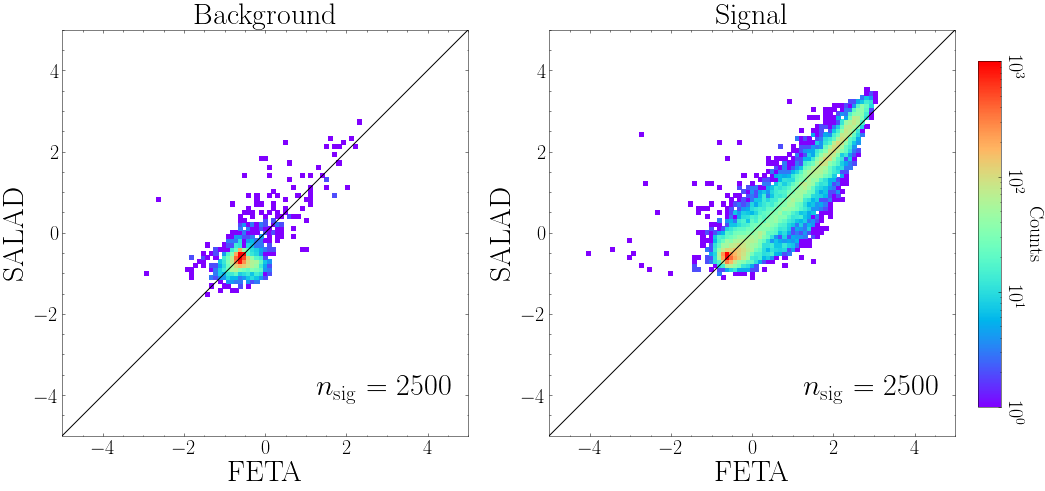

'\nfig = make_plot(stand_feta[:20000], stand_full_sup[:20000], \n          stand_feta[20000:40000], stand_full_sup[20000:40000], \n          f"FETA", f"Full. Sup.")\nfig.savefig(f"paper_plots/feta_v_fullsup{num_signal_to_inject}.pdf", dpi = dpi)\n\n'

In [82]:
fig = make_plot(stand_feta[:20000], stand_cathode[:20000], 
          stand_feta[20000:40000], stand_cathode[20000:40000], 
          f"FETA", f"CATHODE")
fig.savefig(f"paper_plots/feta_v_cathode{num_signal_to_inject}.pdf", dpi = dpi)



fig = make_plot(stand_feta[:20000], stand_curtains[:20000], 
          stand_feta[20000:40000], stand_curtains[20000:40000], 
          f"FETA", f"CURTAINs")
fig.savefig(f"paper_plots/feta_v_curtains{num_signal_to_inject}.pdf", dpi = dpi)



fig = make_plot(stand_feta[:20000], stand_salad[:20000], 
          stand_feta[20000:40000], stand_salad[20000:40000], 
          f"FETA", f"SALAD")
fig.savefig(f"paper_plots/feta_v_salad{num_signal_to_inject}.pdf", dpi = dpi)

"""
fig = make_plot(stand_feta[:20000], stand_full_sup[:20000], 
          stand_feta[20000:40000], stand_full_sup[20000:40000], 
          f"FETA", f"Full. Sup.")
fig.savefig(f"paper_plots/feta_v_fullsup{num_signal_to_inject}.pdf", dpi = dpi)

"""


### Histogram